In [ ]:
!pip install mip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mip
import numpy as np
import matplotlib.pyplot as pp

In [ ]:
np.random.seed( 1728361287 )

In [ ]:
n = 21

nodes = []
for i in range( n ):
    nodes.append( 10 * np.random.normal( size = ( 2, ) ) )


[array([-8.44300759,  0.07055571]), array([-3.96643436,  5.04903296]), array([-13.01019415,   1.71225462]), array([10.3732528 , -6.34199635]), array([-10.98798273,  -7.88530318]), array([-16.55435733,   6.38779882]), array([  9.29928323, -13.55594957]), array([ 4.03967194, 10.15003033]), array([ 6.23122753, -1.63896828]), array([-8.97666627, -9.54035641]), array([-11.55681867,   0.15022458]), array([-11.70726753,  -3.39428484]), array([ 1.16640045, 11.64004582]), array([2.25554607, 7.42145066]), array([-2.17609778,  5.03054892]), array([-22.0425515 ,  11.28683081]), array([-20.92020749,   2.38044083]), array([ 8.93080415, 12.81789504]), array([ 14.49203358, -11.4339739 ]), array([-10.76184343,   0.92917958]), array([-0.36097895, 14.13871454])]


In [ ]:
C = np.zeros( ( n, n ) )

for i in range( n ):
    for j in range( i + 1, n ):
        C[ i, j ] = np.linalg.norm( nodes[ i ] - nodes[ j ] )
        C[ j, i ] = C[ i, j ]

In [ ]:
m = mip.Model( sense = mip.MINIMIZE, solver_name = mip.CBC )

In [ ]:
x = []
for i in range( n ):
    x.append( [ m.add_var( var_type = mip.BINARY, name = 'x_(%i,%i)' % ( i + 1, j + 1 ) )  for j in range( n ) ] )

In [ ]:
for j in range( n ):
    m += mip.xsum( x[ i ][ j ] for i in range( n ) ) == 1

In [ ]:
for j in range( n ):
    m += mip.xsum( x[ i ][ j ] for i in range( n ) ) == mip.xsum( x[ j ][ i ] for i in range( n ) )

In [ ]:
m.objective = mip.xsum( C[ i, j ] * x[ i ][ j ] for i in range( n ) for j in range( n ) )

In [ ]:
#https://docs.python.org/3/library/itertools.html#itertools.combinations
from itertools import combinations
#modificada para retornar listas e nao tuplas

def combinations(iterable, r):
    pool = tuple(iterable)
    n = len(pool)
    if r > n:
        return
    indices = list(range(r))
    yield list(pool[i] for i in indices)
    while True:
        for i in reversed(range(r)):
            if indices[i] != i + n - r:
                break
        else:
            return
        indices[i] += 1
        for j in range(i+1, r):
            indices[j] = indices[j-1] + 1
        yield list(pool[i] for i in indices)

In [ ]:
subconjs = []
for i in range(1, (n//2)+1):
  subconjs.append(list(combinations(range(n), i)))

In [ ]:
for s in subconjs:
  for k in s:
    m += mip.xsum( x[ i ][ j ] for i in k for j in k ) <= len( k ) - 1

In [ ]:
m.write( 'teste.lp' )

In [ ]:
status = m.optimize( max_seconds = 300 )


OptimizationStatus.OPTIMAL


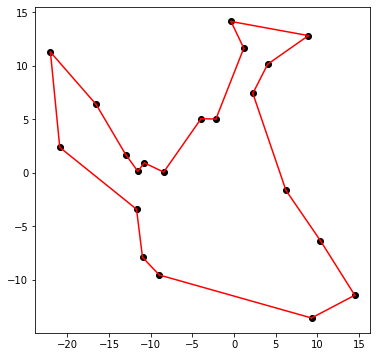

In [ ]:
import matplotlib.pyplot as pp

pp.figure( figsize = ( 6, 6 ) )

for pt in nodes:
    pp.scatter( pt[ 0 ], pt[ 1 ], c = 'k' )

for v in m.vars:
    if v.x > 1e-5:
        idx = [  int(x)  - 1 for x in v.name[ 3 : -1 ].split( ',' ) ]

        o = nodes[ idx[ 0 ] ]
        d = nodes[ idx[ 1 ] ]
        pp.plot( [ o[ 0 ], d[ 0 ] ], [ o[ 1 ], d[ 1 ] ], 'r' )
        

pp.show()

In [ ]:
print( status )

OptimizationStatus.OPTIMAL


In [ ]:
print( status.value )

0
